# Principal Component Analysis (PCA)

In [19]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


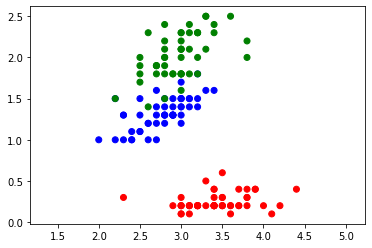

In [17]:
colors = ['red', 'blue', 'green']
fig, ax = plt.subplots()
ax.scatter(df['sepal width (cm)'], df['petal width (cm)'], color=[colors[i]for i in df.target])
plt.axis('equal')
plt.show()

In [21]:
X = df.drop('target', axis = 1).values
y = df.target.values

#### 1. Scaling Data:  
- PCA calculates a new projection of our data on a new axis using the standard deviation of our data. PCA gives more weight to variables that have higher variances than variables with low variances, 
- so it is important to normalize the data on the same scale to get a reasonable covariance.

In [22]:
pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

pca_X = pipe.fit_transform(X)

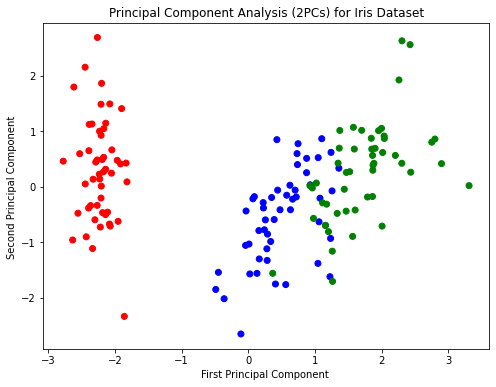

In [31]:
# Visualize Principal Components with a scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('First Principal Component ')
ax.set_ylabel('Second Principal Component ')
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset')

ax.scatter(pca_X[:,0], pca_X[:,1], color=[colors[i]for i in df.target])
plt.show()

- 3 classes are pretty distinct and fairly separable. We can conclude that the compressed data representation is most likely sufficient for a classification model.
- Variance in the overall dataset to what was captured from our two primary components using `.explained_variance_ratio_`.
    -  First two principal components explain the majority of the variance in this dataset (95.81%)! This is an indication of the total information represented compared to the original data.

In [38]:
# Calculate the variance explained by each priciple components
print('Variance of each component:', pipe['pca'].explained_variance_ratio_)
print('Total Variance Explained:', round(sum(pipe['pca'].explained_variance_ratio_)*100, 2))

Variance of each component: [0.72962445 0.22850762]
Total Variance Explained: 95.81
